### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

La rete neurale composta per risolvere questo esercizio è composta da 4 layer con rispettivamente 20,100,100 e 1 neurone, funzione di attivazione *relu* e ottimizzatore *sgd*. I dati letti dalla rete sono composti da una matrice di *input data* con *ntrain* righe e 2 colonne e degli *output data* raccolti in un vettore. 

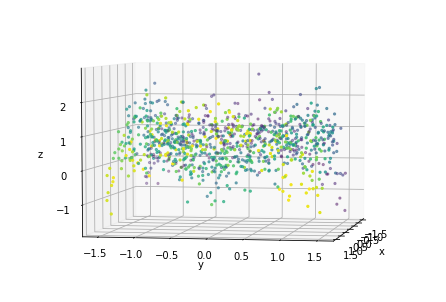

In [175]:
import numpy as np
import matplotlib.pyplot as plt

ntrain=1000
nvalid=1000
sigma = 0.5 # noise standard deviation, for the moment it is absent
np.random.seed(0) # generate training inputs

x_train = np.random.rand(ntrain,2)
x_valid = np.random.rand(nvalid,2)
y_target = np.zeros(nvalid)
y_train = np.zeros(ntrain)
y_valid = np.zeros(nvalid)

for i in range(len(y_target)):
    x_train [i,0] = x_train [i,0]*3-1.5
    x_valid [i,1] = x_valid [i,1]*3-1.5
    x_train [i,1] = x_train [i,1]*3-1.5
    x_valid [i,0] = x_valid [i,0]*3-1.5
    y_target [i] = np.sin(x_valid[i,0]**2+x_valid[i,1]**2)# ideal (target) linear function
    y_train [i] = np.random.normal(np.sin(x_train[i,0]**2+x_train[i,1]**2), sigma) # actual measures from which we want to guess regression parameters
    y_valid [i] = np.random.normal(np.sin(x_valid[i,0]**2+x_valid[i,1]**2), sigma) # actual measures from which we want to guess regression parameters

# plot training (red) and target dataset (blue)
from mpl_toolkits.mplot3d import Axes3D
plt.rc('axes', titlesize=5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1], y_valid, c=x_valid[:,0], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(5,10)
plt.show()

In [176]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(20, input_dim=2,activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 20)                60        
_________________________________________________________________
dense_113 (Dense)            (None, 100)               2100      
_________________________________________________________________
dense_114 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 101       
Total params: 12,361
Trainable params: 12,361
Non-trainable params: 0
_________________________________________________________________


In [177]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 1000 samples
Epoch 1/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5193 - mean_squared_error: 0.5193 - val_loss: 0.4206 - val_mean_squared_error: 0.4206
Epoch 2/150
1000/1000 [==============================] - 1s 823us/sample - loss: 0.4509 - mean_squared_error: 0.4509 - val_loss: 0.4133 - val_mean_squared_error: 0.4133
Epoch 3/150
1000/1000 [==============================] - 1s 539us/sample - loss: 0.4423 - mean_squared_error: 0.4423 - val_loss: 0.4070 - val_mean_squared_error: 0.4070
Epoch 4/150
1000/1000 [==============================] - 0s 496us/sample - loss: 0.4377 - mean_squared_error: 0.4377 - val_loss: 0.4013 - val_mean_squared_error: 0.4013
Epoch 5/150
1000/1000 [==============================] - 1s 625us/sample - loss: 0.4328 - mean_squared_error: 0.4328 - val_loss: 0.4073 - val_mean_squared_error: 0.4073
Epoch 6/150
1000/1000 [==============================] - 1s 824us/sample - loss: 0.4302 - mean_squared_error:

Epoch 49/150
1000/1000 [==============================] - 1s 592us/sample - loss: 0.3658 - mean_squared_error: 0.3658 - val_loss: 0.3615 - val_mean_squared_error: 0.3615
Epoch 50/150
1000/1000 [==============================] - 0s 387us/sample - loss: 0.3644 - mean_squared_error: 0.3644 - val_loss: 0.3565 - val_mean_squared_error: 0.3565
Epoch 51/150
1000/1000 [==============================] - 1s 613us/sample - loss: 0.3628 - mean_squared_error: 0.3628 - val_loss: 0.3553 - val_mean_squared_error: 0.3553
Epoch 52/150
1000/1000 [==============================] - 1s 839us/sample - loss: 0.3602 - mean_squared_error: 0.3602 - val_loss: 0.3592 - val_mean_squared_error: 0.3592
Epoch 53/150
1000/1000 [==============================] - 1s 763us/sample - loss: 0.3585 - mean_squared_error: 0.3585 - val_loss: 0.3539 - val_mean_squared_error: 0.3539
Epoch 54/150
1000/1000 [==============================] - 1s 528us/sample - loss: 0.3565 - mean_squared_error: 0.3565 - val_loss: 0.3524 - val_mean_sq

1000/1000 [==============================] - 1s 758us/sample - loss: 0.2752 - mean_squared_error: 0.2752 - val_loss: 0.2931 - val_mean_squared_error: 0.2931
Epoch 98/150
1000/1000 [==============================] - 1s 513us/sample - loss: 0.2747 - mean_squared_error: 0.2747 - val_loss: 0.2863 - val_mean_squared_error: 0.2863
Epoch 99/150
1000/1000 [==============================] - 1s 562us/sample - loss: 0.2726 - mean_squared_error: 0.2726 - val_loss: 0.2925 - val_mean_squared_error: 0.2925
Epoch 100/150
1000/1000 [==============================] - 1s 585us/sample - loss: 0.2722 - mean_squared_error: 0.2722 - val_loss: 0.2848 - val_mean_squared_error: 0.2848
Epoch 101/150
1000/1000 [==============================] - 1s 687us/sample - loss: 0.2692 - mean_squared_error: 0.2692 - val_loss: 0.2869 - val_mean_squared_error: 0.2869
Epoch 102/150
1000/1000 [==============================] - 0s 490us/sample - loss: 0.2697 - mean_squared_error: 0.2697 - val_loss: 0.2860 - val_mean_squared_erro

1000/1000 [==============================] - 1s 514us/sample - loss: 0.2489 - mean_squared_error: 0.2489 - val_loss: 0.2775 - val_mean_squared_error: 0.2775
Epoch 146/150
1000/1000 [==============================] - 1s 706us/sample - loss: 0.2489 - mean_squared_error: 0.2489 - val_loss: 0.2758 - val_mean_squared_error: 0.2758
Epoch 147/150
1000/1000 [==============================] - 0s 371us/sample - loss: 0.2474 - mean_squared_error: 0.2474 - val_loss: 0.2782 - val_mean_squared_error: 0.2782
Epoch 148/150
1000/1000 [==============================] - 1s 543us/sample - loss: 0.2465 - mean_squared_error: 0.2465 - val_loss: 0.2746 - val_mean_squared_error: 0.2746
Epoch 149/150
1000/1000 [==============================] - 1s 756us/sample - loss: 0.2470 - mean_squared_error: 0.2470 - val_loss: 0.2755 - val_mean_squared_error: 0.2755
Epoch 150/150
1000/1000 [==============================] - 0s 496us/sample - loss: 0.2477 - mean_squared_error: 0.2477 - val_loss: 0.2717 - val_mean_squared_er

In [178]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1000/1000 [==============================] - 0s 201us/sample - loss: 0.2717 - mean_squared_error: 0.2717

Test loss: 0.2717371211051941
Test accuracy: 0.2717371


In [179]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1000/1000 [==============================] - 0s 194us/sample - loss: 0.0115 - mean_squared_error: 0.0115

Test loss: 0.011529965132474899
Test accuracy: 0.011529965


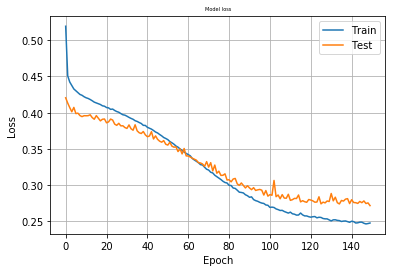

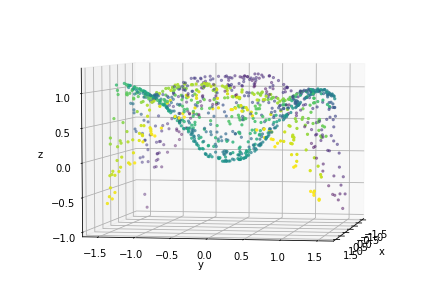

In [181]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.rand(nvalid,2)*3-1.5
y_predicted = model.predict(x_predicted)
y_target = np.zeros(nvalid)
for i in range(len(x_predicted[0][:])):
    y_target[i]=np.sin(x_valid[0][i]**2+x_valid[1][i]**2)

from mpl_toolkits.mplot3d import Axes3D
plt.rc('axes', titlesize=5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, c=x_predicted[:,0], marker='.')
#ax.scatter(x_predicted[0][:], x_predicted[1][:], y_target, c=x_predicted[0][:], marker='*')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(5,10)
plt.show()